In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

In [3]:
# with open("student_class.csv", "a", encoding="utf-8") as file:
#     file.write("Hours,Extra_Class,Sleep_Hours,Scores\n")
#     file.write("2.5,1,7,21\n")
#     file.write("5.1,2,6,47\n")
#     file.write("3.2,1,8,27\n")
#     file.write("8.5,3,5,75\n")
#     file.write("3.5,1,7,30\n")
#     file.write("1.0,0,9,17\n")
#     file.write("9.0,2,6,85\n")
#     file.write("7.5,2,6,67")


In [4]:
data = pd.read_csv("student_class.csv")
print(data)

   Hours  Extra_Class  Sleep_Hours  Scores
0    2.5            1            7      21
1    5.1            2            6      47
2    3.2            1            8      27
3    8.5            3            5      75
4    3.5            1            7      30
5    1.0            0            9      17
6    9.0            2            6      85
7    7.5            2            6      67


In [5]:
X = data[["Hours", "Extra_Class", "Sleep_Hours"]]
y = data["Scores"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
print(f"w = {model.coef_}")
print(f"b = {model.intercept_}")

w = [10.44399185 -4.50835031 -0.48594705]
b = 1.9751527494907748


In [7]:
y_pred = model.predict(X_test)

print(f"mse = {mean_squared_error(y_test, y_pred)}")
print(f"r^2 = {r2_score(y_test, y_pred)}")

mse = 46.90910067570661
r^2 = 0.7915151081079707


In [8]:
sample = [[5.0, 3, 9]]
predicted_scores = model.predict(sample)
print(predicted_scores)

[36.29653768]


c:\Users\TUAN NGOC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

print("mse after std: ", mean_squared_error(y_test, y_pred_scaled))
print("R^2 Score after std: ", r2_score(y_test, y_pred_scaled))

mse after std:  46.90910067570693
R^2 Score after std:  0.7915151081079692


In [18]:
data_z = data.copy()
data_z["Z_Hours"] = zscore(data_z["Hours"])
data_z["Z_Extra_Class"] = zscore(data_z["Extra_Class"])
data_z["Z_Sleep_Hours"] = zscore(data_z["Sleep_Hours"])

print(data_z[["Hours", "Z_Hours", "Extra_Class", "Z_Extra_Class", "Sleep_Hours", "Z_Sleep_Hours"]])

   Hours   Z_Hours  Extra_Class  Z_Extra_Class  Sleep_Hours  Z_Sleep_Hours
0    2.5 -0.909747            1      -0.577350            7       0.208514
1    5.1  0.022408            2       0.577350            6      -0.625543
2    3.2 -0.658782            1      -0.577350            8       1.042572
3    8.5  1.241379            3       1.732051            5      -1.459601
4    3.5 -0.551226            1      -0.577350            7       0.208514
5    1.0 -1.447528            0      -1.732051            9       1.876630
6    9.0  1.420639            2       0.577350            6      -0.625543
7    7.5  0.882858            2       0.577350            6      -0.625543


In [20]:
outlier_condition = (
    (abs(data_z["Z_Hours"]) > 2) |
    (abs(data_z["Z_Extra_Class"]) > 2) |
    (abs(data_z["Z_Sleep_Hours"]) > 2)
)

outliers = data[outlier_condition]
print(outliers)

Empty DataFrame
Columns: [Hours, Extra_Class, Sleep_Hours, Scores]
Index: []


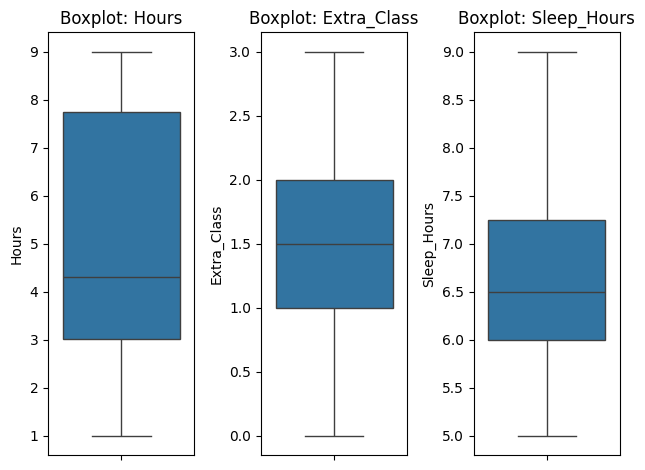

In [32]:
for i, col in enumerate(["Hours", "Extra_Class", "Sleep_Hours"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

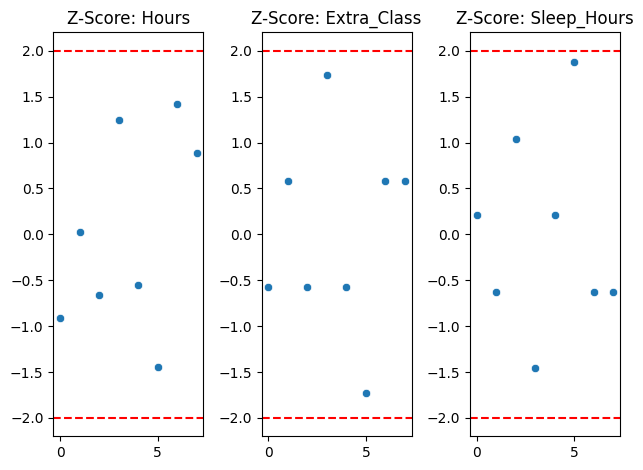

In [31]:
for i, col in enumerate(["Hours", "Extra_Class", "Sleep_Hours"]):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=range(len(data)), y=zscore(data[col]))
    plt.axhline(2, color="red", linestyle="--")
    plt.axhline(-2, color="red", linestyle="--")
    plt.title(f"Z-Score: {col}")

plt.tight_layout()
plt.show()

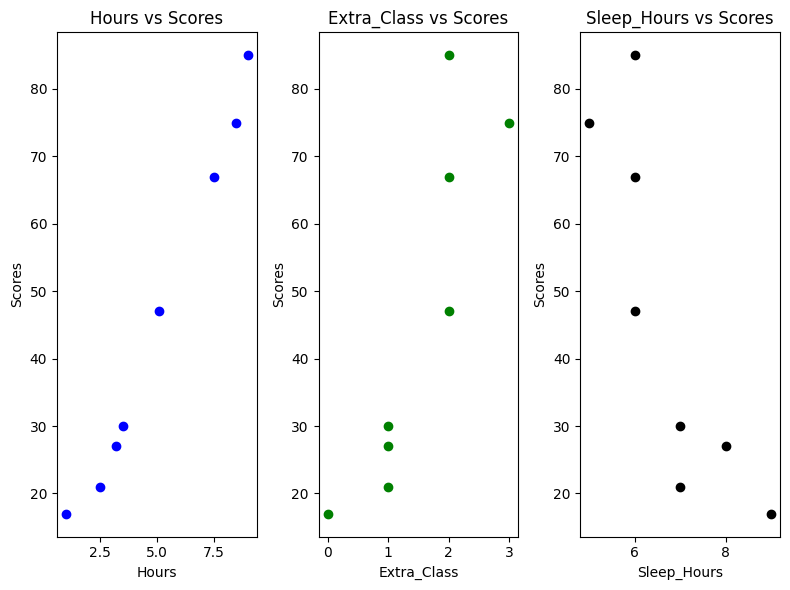

In [38]:
COLOR = ["blue", "green", "black"]
fig, axs = plt.subplots(1, 3, figsize=(8, 6))

for i, col in enumerate(["Hours", "Extra_Class", "Sleep_Hours"]):
    axs[i].scatter(data[col], data["Scores"], color=COLOR[i])
    axs[i].set_title(f"{col} vs Scores")
    axs[i].set_xlabel(f"{col}")
    axs[i].set_ylabel("Scores")

plt.tight_layout()
plt.show()

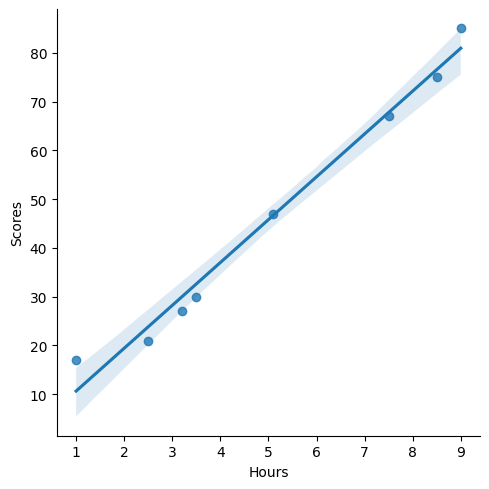

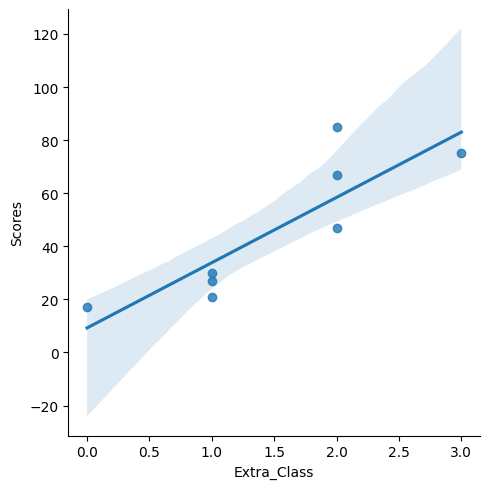

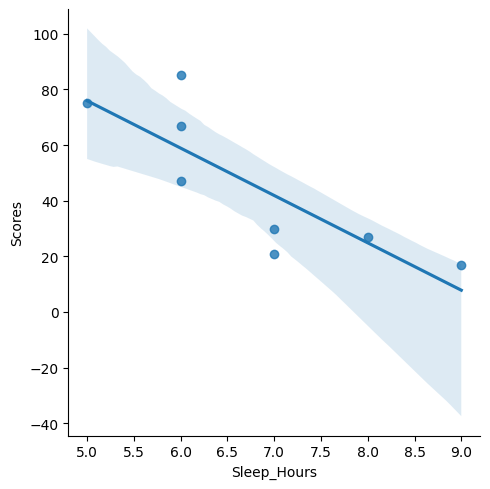

In [47]:
for col in ["Hours", "Extra_Class", "Sleep_Hours"]:
    sns.lmplot(data=data, x=col, y="Scores")
